In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sofa import BitErrorRate
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [14]:
# Datos
df = pd.DataFrame()
datos = 0
if datos == 0:
    df['X1'] = np.array([0.3, 0.42, 0.5, 0.4, 0.1, 0.35, 0.4, 0.55, 0.24, 0.1, 0.33, 0.45, 0.52,
                         0.43, 0.05, 0.3, 0.44, 0.5, 0.2, 0.1, 0.3])
    df['X2'] = np.array([0.14, 0.7, 0.5, 0.3, 0.12, 0.31, 0.5, 0.52, 0.44, 0.2, 0.1, 0.6, 0.42,
                         0.35, 0.17, 0.36, 0.4, 0.5, 0.4, 0.25, 0.6])
    df['y'] = np.array([0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1])
else:
    tam = 100
    Clases = 2
    X1 = np.random.rand(1, tam)
    X2 = np.random.rand(1, tam)
    y = np.random.randint(Clases, size = tam)
    X1 = X1[0]
    X2 = X2[0]

In [15]:
df = df.sort_values('y')
df.head()

,X1,X2,y
0,0.30,0.14,0
18,0.20,0.40,0
14,0.05,0.17,0
19,0.10,0.25,0
9,0.10,0.20,0


In [16]:
X1 = np.array((df['X1']))
X2 = np.array((df['X2']))
y = np.array((df['y']))

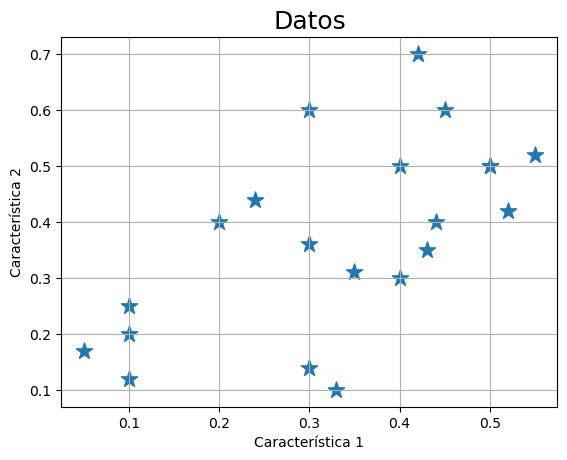

In [17]:
plt.title('Datos', fontsize = 18)
plt.scatter(X1, X2, s = 150, marker = '*')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid()
plt.show()

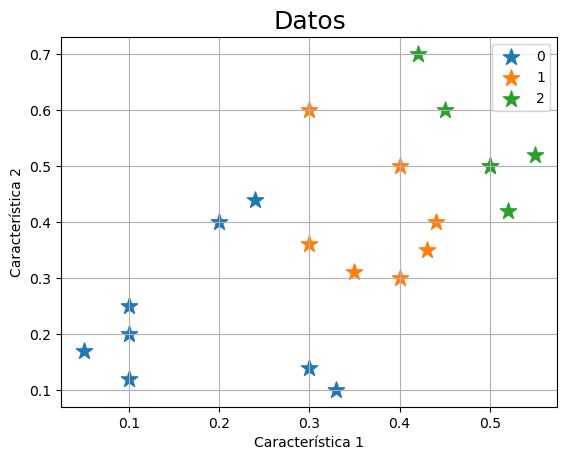

In [18]:
plt.title('Datos', fontsize = 18)
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X1[ix], X2[ix], label = g, s = 150, marker = '*')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid()
plt.show()

In [19]:
X = np.transpose(np.array([X1, X2]))

In [20]:
model = DBSCAN(eps = 0.15, min_samples = 3).fit(X)

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [22]:
model.labels_

array([-1,  0,  1,  1,  1,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0], dtype=int64)

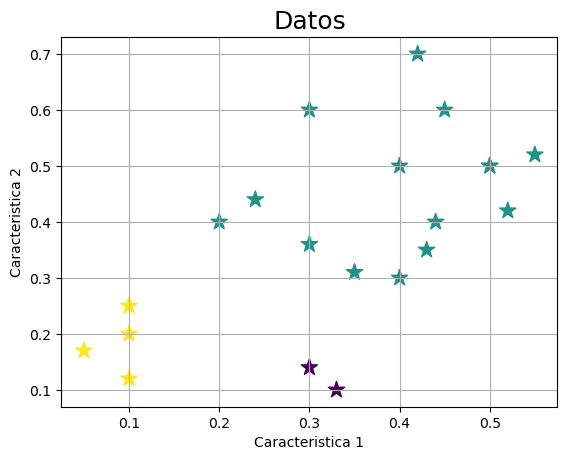

In [23]:
plt.scatter(X[:, 0], X[:, 1], c = model.labels_, s = 150, marker = '*')
plt.title('Datos', fontsize = 18)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.grid()
plt.show()

In [24]:
BitErrorRate(model.labels_, y)

(0.25, 21)